**Crear un programa en Python utilizando la biblioteca control para diseñar y
analizar un controlador proporcional, integral y derivativo (PID) para un
sistema lineal invariante en el tiempo.**


In [2]:
pip install control


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 5.3 MB/s eta 0:00:00


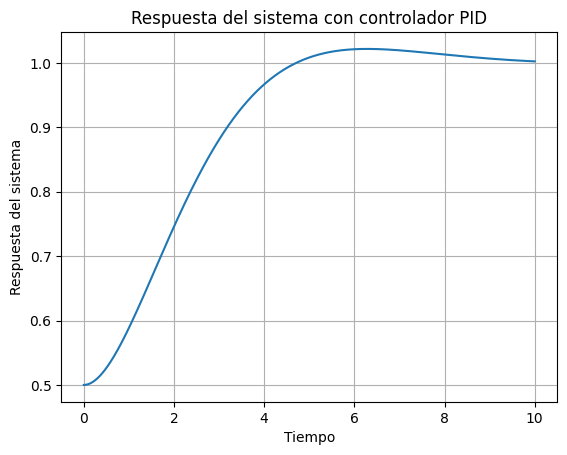

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import control #proporciona herramientas para análisis y diseño de sistemas de control.

# Definir los parámetros del controlador PID
Kp = 1.0  # Ganancia proporcional
Ki = 1.0  # Ganancia integral
Kd = 1.0  # Ganancia derivativa

# Crear el controlador PID utilizando la función tf de la biblioteca control
# tf([A, B], [C, D]) crea una función de transferencia (A*s^2 + B*s + C) / (s + D)
#Se crea el controlador PID utilizando la función tf de la biblioteca Control.
#La función tf toma dos listas como argumentos: la primera lista contiene los coeficientes del numerador de la función de transferencia
#y la segunda lista contiene los coeficientes del denominador.
#En este caso, se crea un controlador PID con los coeficientes [Kd, Kp, Ki] en el numerador y [1, 0] en el denominador.
pid_controller = control.tf([Kd, Kp, Ki], [1, 0])

# Definir un sistema lineal invariante en el tiempo para analizar
# En este caso, usaremos un sistema de primer orden con una constante de tiempo de 1
system = control.tf([1], [1, 1])#sistema de primer orden con un numerador [1] y un denominador [1, 1], lo que representa un sistema con una constante de tiempo de 1.

# Conectar el controlador PID al sistema
#Se conecta el controlador PID al sistema utilizando la función feedback de la biblioteca Control.
#Esto forma el sistema de lazo cerrado, donde la salida del sistema se retroalimenta al controlador PID.
closed_loop_system = control.feedback(pid_controller*system)

# Crear una señal de entrada para el sistema
#se utiliza un escalón unitario que comienza en el tiempo 0 y dura 10 segundos.
t = np.linspace(0, 10, 1000)  # Tiempo
u = np.ones_like(t)  # Señal de entrada (escalón unitario)

# Simular la respuesta del sistema
#Se simula la respuesta del sistema utilizando la función forced_response de la biblioteca Control.
#Esto calcula la respuesta del sistema de lazo cerrado a la señal de entrada u durante el intervalo de tiempo t.
t, y = control.forced_response(closed_loop_system, t, u)

# Graficar la respuesta del sistema
plt.figure()
plt.plot(t, y)
plt.title('Respuesta del sistema con controlador PID')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta del sistema')
plt.grid(True)
plt.show()
